                                    TITANIC : MACHINE LEARNING FROM DISTATER

Importing the required packages for the project

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

Reading the csv files and then merging the dataframes

In [2]:
dead = pd.read_csv('gender_submission.csv', sep=',')
train_data= pd.read_csv('train.csv', sep=',')
test_data= pd.read_csv('test.csv', sep=',')
test_merge= test_data.merge(dead, on = 'PassengerId')
complete_data = [train_data, test_merge]
result = pd.concat(complete_data, ignore_index = True)

C:\Users\saiha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
#result.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

# view changes
#result.info()

In [4]:
result.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [5]:
result.info()
result.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [6]:
#replace nan values in AGE feature with mean of age values
#result['Age'].dropna()
#result['Age'].fillna(result['Age'].mean(), inplace=True)
#import numpy as np
#replacing nan values with the mean value
#result['Age'] = result['Age'].replace(np.nan, 30)


In [7]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [8]:
titles = sorted(set([x for x in result.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

Different titles found on the dataset:
18 : ['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']



In [9]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [10]:
result['Title'] = result['Name'].map(lambda x: get_title(x))

In [11]:
result['Title'] = result.apply(replace_titles, axis=1)

In [12]:
print('Title column values. Males and females are the same that for the "Sex" column:')
print(result.Title.value_counts())


Title column values. Males and females are the same that for the "Sex" column:
Mr        782
Miss      264
Mrs       202
Master     61
Name: Title, dtype: int64


In [13]:
result.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877,Mr
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463,Mr
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909,Master
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742,Mrs
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736,Mrs


In [14]:
grouped = result.groupby(['Sex','Pclass', 'Title'])


# view the median Age by the grouped features
grouped.Age.median()

Sex     Pclass  Title 
female  1       Miss      30.0
                Mrs       45.0
        2       Miss      20.0
                Mrs       30.5
        3       Miss      18.0
                Mrs       31.0
male    1       Master     6.0
                Mr        42.0
        2       Master     2.0
                Mr        30.0
        3       Master     6.0
                Mr        26.0
Name: Age, dtype: float64

In [15]:
result.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

# view changes
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 133.0+ KB


In [16]:
result.loc[ result['Age'] <= 16, 'Age']= 0
result.loc[(result['Age'] > 16) & (result['Age'] <= 32), 'Age'] = 1
result.loc[(result['Age'] > 32) & (result['Age'] <= 48), 'Age'] = 2
result.loc[(result['Age'] > 48) & (result['Age'] <= 64), 'Age'] = 3
result.loc[ result['Age'] > 64, 'Age']                           = 4

In [17]:
result['Age'].head()

0    1.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: Age, dtype: float64

In [18]:
result.Cabin = result.Cabin.fillna('U')
#result['Cabin'] = result['Cabin'].replace(to_replace =['A','B','C','D','E','F','G','T',np.nan], value =[1,2,3,4,4,4,4,4,4])

In [19]:
result['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [20]:
#result["Embarked"].fillna(lambda x: random.choice(result['Embarked'] != np.nan["Embarked"]), inplace =True)
result['Embarked'].fillna('S', inplace = True)

In [21]:
result['Embarked'].isnull().sum()

0

In [22]:
result['Embarked'] = result['Embarked'].replace(to_replace =['S','C','Q'], value =[1,2,3])

In [23]:
result['Embarked'].head()

0    1
1    2
2    1
3    1
4    1
Name: Embarked, dtype: int64

In [24]:
result.isnull().sum()

Age            0
Cabin          0
Embarked       0
Fare           1
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
dtype: int64

In [25]:
result.Fare = result.Fare.fillna(result.Fare.median())
result['Fare'].head()
result.loc[result['Fare'] <= 10, 'Fare']= 0
result.loc[(result['Fare'] > 10) & (result['Fare'] <= 30), 'Fare'] = 1
result.loc[result['Fare'] > 30, 'Fare'] = 2

result.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,1.0,U,1,0.0,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,2.0,C85,2,2.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,1.0,U,1,0.0,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,2.0,C123,1,2.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,2.0,U,1,0.0,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


In [26]:
result.Sex = result.Sex.map({"male": 0, "female":1})
result.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,1.0,U,1,0.0,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,Mr
1,2.0,C85,2,2.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,Mrs
2,1.0,U,1,0.0,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,Miss
3,2.0,C123,1,2.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,Mrs
4,2.0,U,1,0.0,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,Mr


In [27]:
for index in range(0,len(result)):
    tuple=result['Cabin'].iloc[index]
    try:
        tuple = [c for c in result['Cabin'].iloc[index] if c.isalpha()]
        result['Fare'].iloc[index]=result['Fare'].iloc[index]/len(tuple)
        result['Cabin'].iloc[index]=tuple[0]
    except:
        a=1


C:\Users\saiha\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
result.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,1.0,U,1,0.0,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,Mr
1,2.0,C,2,2.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,Mrs
2,1.0,U,1,0.0,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,Miss
3,2.0,C,1,2.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,Mrs
4,2.0,U,1,0.0,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,Mr


In [29]:
result['Cabin'] = result['Cabin'].replace(to_replace =['A','B','C','D','E','F','G','T','U'], value =[1,2,3,4,4,4,4,4,4])
result.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,1.0,4,1,0.0,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,Mr
1,2.0,3,2,2.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,Mrs
2,1.0,4,1,0.0,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,Miss
3,2.0,3,1,2.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,Mrs
4,2.0,4,1,0.0,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,Mr


In [30]:
def bar_chart(feature):
    survived = result[result['Survived']==1][feature].value_counts()
    dead = result[result['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.ylabel('Number of people')
    #plt.title('Plot to show how many female and male survived')

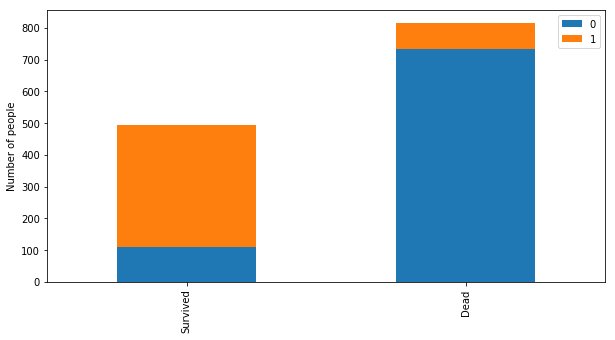

In [31]:
bar_chart('Sex')

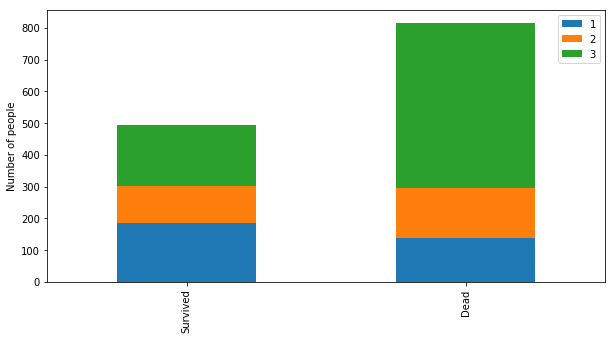

In [32]:
bar_chart('Pclass')

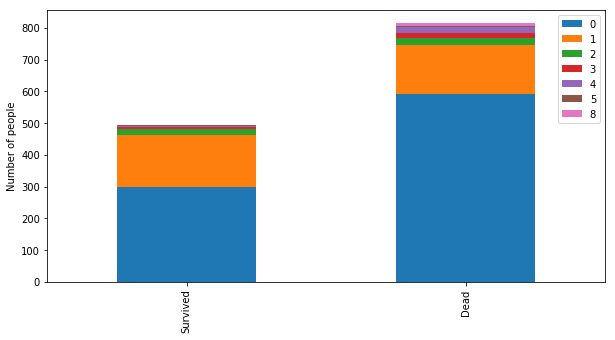

In [33]:
bar_chart('SibSp')

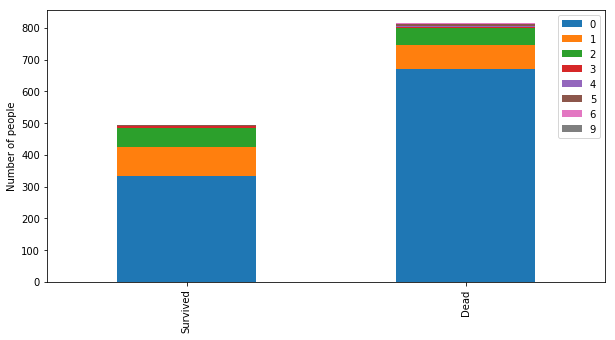

In [34]:
bar_chart('Parch')

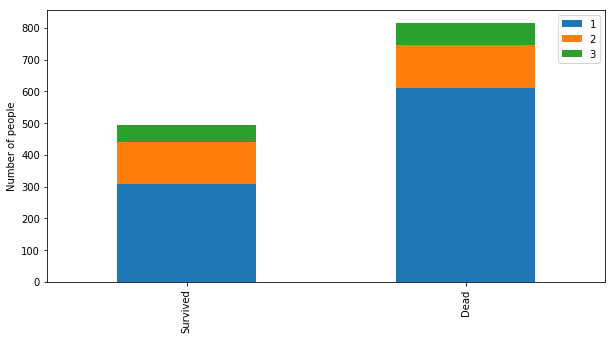

In [35]:
bar_chart('Embarked')

In [36]:
print("CORRELATION MATRIX")
corr = result.corr()
corr.style.background_gradient()

CORRELATION MATRIX


,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
Age,1,-0.262569,-0.0274261,0.188103,-0.122346,0.00629097,-0.446967,-0.0435472,-0.202582,-0.0214021
Cabin,-0.262569,1,-0.0568682,-0.353552,-0.0366559,-0.0121018,0.561132,-0.0699462,0.0128216,-0.161513
Embarked,-0.0274261,-0.0568682,1,-0.0856693,-0.0955231,0.0401426,0.0388754,0.120423,-0.0734611,0.111625
Fare,0.188103,-0.353552,-0.0856693,1,0.305762,0.00352607,-0.67744,0.220253,0.33921,0.259752
Parch,-0.122346,-0.0366559,-0.0955231,0.305762,1,0.00894208,0.0183222,0.213125,0.373587,0.108919
PassengerId,0.00629097,-0.0121018,0.0401426,0.00352607,0.00894208,1,-0.0383544,-0.0134057,-0.055224,-0.0203697
Pclass,-0.446967,0.561132,0.0388754,-0.67744,0.0183222,-0.0383544,1,-0.124617,0.060832,-0.26471
Sex,-0.0435472,-0.0699462,0.120423,0.220253,0.213125,-0.0134057,-0.124617,1,0.109609,0.688371
SibSp,-0.202582,0.0128216,-0.0734611,0.33921,0.373587,-0.055224,0.060832,0.109609,1,0.00237035
Survived,-0.0214021,-0.161513,0.111625,0.259752,0.108919,-0.0203697,-0.26471,0.688371,0.00237035,1


In [37]:
result.drop(columns = ['Name', 'Ticket'], inplace = True)

In [38]:
result.head()
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null int64
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       1309 non-null int64
Title          1309 non-null object
dtypes: float64(2), int64(8), object(1)
memory usage: 112.6+ KB


In [45]:
X = result.iloc[:,:-1]
y = result.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
#count_misclassified = (y_test != y_pred).sum()
#print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy: {:.2f}'.format(accuracy))

Decision Tree Accuracy: 0.87


In [44]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
logreg = LogisticRegression()
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      Master       1.00      0.76      0.87        17
        Miss       0.69      0.83      0.75        88
          Mr       0.98      1.00      0.99       206
         Mrs       0.76      0.59      0.66        82

   micro avg       0.87      0.87      0.87       393
   macro avg       0.86      0.79      0.82       393
weighted avg       0.87      0.87      0.86       393

LogisticRegression accuracy is 0.873


C:\Users\saiha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saiha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
